In [1]:
!pip install nltk

In [2]:
# Add this as a new cell near the top
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mkl-fft to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-random to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of mkl-umath to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 91.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which 

In [3]:
!pip install --upgrade numpy pandas scikit-learn nltk spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-

In [4]:
!pip install "numpy~=1.26"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 200.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
onnx 1.18.0 requires protobuf>=4.

In [5]:
!pip install tokenizers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 1.0.0rc2
    Uninstalling huggingface-hub-1.0.0rc2:
      Successfully uninstalled huggingface-hub-1.0.0rc2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.1.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
gradio 5.38.1 requires pydantic<2.12,>=2.0, but you have pydantic 2.12.0a1 which is incompatible.


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import json
import numpy as np
import re
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [7]:
import json
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

# --- 1. Load all text for training the tokenizer ---
# We need all source (En) and target (Bn, Hi) sentences
try:
    with open('/kaggle/input/capstone-project/train_data1.json', 'r', encoding='utf-8-sig') as file:
        all_data = json.load(file)
except UnicodeDecodeError:
    print("UTF-8-SIG failed, trying latin-1...")
    with open('/kaggle/input/capstone-project/train_data1.json', 'r', encoding='latin-1') as file:
        all_data = json.load(file)

all_sentences = []

# Add English-Bengali sentences
if "English-Bengali" in all_data and "Train" in all_data["English-Bengali"]:
    for entry in all_data["English-Bengali"]["Train"].values():
        all_sentences.append(entry["source"])
        all_sentences.append(entry["target"])
print(f"Loaded {len(all_sentences)} sentences from Bengali data...")

# Add English-Hindi sentences
if "English-Hindi" in all_data and "Train" in all_data["English-Hindi"]:
    for entry in all_data["English-Hindi"]["Train"].values():
        all_sentences.append(entry["source"])
        all_sentences.append(entry["target"])
print(f"Loaded a total of {len(all_sentences)} sentences for tokenizer training.")

# --- 2. Configure and Train the BPE Tokenizer ---
# We use a shared vocabulary for all languages
VOCAB_SIZE = 32000 # You can tune this
tokenizer_path = 'bpe_tokenizer.json'

# Initialize a new BPE tokenizer
bpe_tokenizer = Tokenizer(BPE(unk_token="<UNK>"))
bpe_tokenizer.pre_tokenizer = Whitespace()

# Define the trainer
trainer = BpeTrainer(
    vocab_size=VOCAB_SIZE,
    special_tokens=["<UNK>", "<PAD>", "<SOS>", "<EOS>"]
)

# --- 3. Train and Save ---
print("Training BPE tokenizer...")
bpe_tokenizer.train_from_iterator(all_sentences, trainer=trainer)

# Save the tokenizer to a file
bpe_tokenizer.save(tokenizer_path)
print(f"Tokenizer trained with {bpe_tokenizer.get_vocab_size()} tokens and saved to {tokenizer_path}")

Loaded 137698 sentences from Bengali data...
Loaded a total of 299292 sentences for tokenizer training.
Training BPE tokenizer...



Tokenizer trained with 32000 tokens and saved to bpe_tokenizer.json


In [8]:
nltk.download('punkt_tab')
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
# Process JSON data
source_sentences_train = []
target_sentences_train = []

source_sentences_val = []
target_sentences_val = []

id_train = []
id_val = []

In [10]:
# Change 'data.items()' to 'all_data.items()'
for language_pair, language_data in all_data.items():
    print(f"Language Pair: {language_pair}")

Language Pair: English-Bengali
Language Pair: English-Hindi


In [11]:
# for language_pair, language_data in data.items():
#     if(language_pair == "English-Bengali"):
#       print(f"Language Pair: {language_pair}")
#       for data_type, data_entries in language_data.items():
#           print(f"  Data Type: {data_type}")
#           for entry_id, entry_data in data_entries.items():
#               source = entry_data["source"]
#               target = entry_data["target"]
#               if (data_type == "Validation"):
#                 source_sentences_val.append(source)
#                 target_sentences_val.append(target)
#                 id_val.append(entry_id)
#               else:
#                 source_sentences_train.append(source)
#                 target_sentences_train.append(target)
#                 id_train.append(entry_id)

In [12]:
# with open('/kaggle/input/capstone-project/val_data1.json', 'r') as file: # Replace this path with the dataset path in your local machine
    # data = json.load(file)

In [13]:
# for language_pair, language_data in data.items():
#     if(language_pair == "English-Bengali"):
#       print(f"Language Pair: {language_pair}")
#       for data_type, data_entries in language_data.items():
#           print(f"  Data Type: {data_type}")
#           for entry_id, entry_data in data_entries.items():
#               source = entry_data["source"]
              #target = entry_data["target"]
              # if (data_type == "Validation"):
              #   source_sentences_val.append(source)
                #target_sentences_val.append(target)
                #id_val.append(entry_id)
              #else:
                #source_sentences_train.append(source)
                #target_sentences_train.append(target)
                #id_train.append(entry_id)

In [14]:
# import json
# from sklearn.model_selection import train_test_split

# --- 1. Load all available labeled data ---
# print("Loading all available training data...")
# with open('/kaggle/input/capstone/train_data1.json', 'r') as file:
#     all_data = json.load(file)

# source_sentences_full = []
# target_sentences_full = []

# This example is for Bengali, change to "English-Hindi" for the other run
# for entry_id, entry_data in all_data["English-Bengali"]["Train"].items():
#     source_sentences_full.append(entry_data["source"])
#     target_sentences_full.append(entry_data["target"])

# print(f"Total labeled sentences found: {len(source_sentences_full)}")


# --- 2. Split the data into training and validation sets ---
# print("Splitting data into training and validation sets...")
# source_sentences_train, source_sentences_val, target_sentences_train, target_sentences_val = train_test_split(
#     source_sentences_full,
#     target_sentences_full,
#     test_size=0.1,
#     random_state=42
# )


# --- 3. Load the unlabeled test data for final prediction ---
# print("Loading unlabeled test data...")
# with open('/kaggle/input/capstone/val_data1.json', 'r') as file:
#     test_data = json.load(file)

# This is the line that creates the variable you are missing
# source_sentences_test = []
# id_test = []

# for entry_id, entry_data in test_data["English-Bengali"]["Validation"].items():
#     source_sentences_test.append(entry_data["source"])
#     id_test.append(entry_id)


# --- 4. Verify the final counts ---
# print("\n--- Data Loading Complete ---")
# print(f"Training sentences:   {len(source_sentences_train)}")
# print(f"Validation sentences: {len(source_sentences_val)}")
# print(f"Test sentences:       {len(source_sentences_test)}")

In [15]:
# --- BPE Tokenizer functions ---
# This cell replaces the old preprocess_sentence, build_vocab, and encode_and_pad
from tokenizers import Tokenizer
import torch

# --- Set sequence length (can be adjusted) ---
seq_length = 100 # Increased from 64
batch_size = 32
# max_vocab is now controlled by the tokenizer itself

def get_tokenizer(path='bpe_tokenizer.json'):
    """Loads the trained tokenizer from file."""
    tokenizer = Tokenizer.from_file(path)
    # Enable padding and truncation
    tokenizer.enable_padding(direction='right', length=seq_length, pad_id=tokenizer.token_to_id("<PAD>"))
    tokenizer.enable_truncation(max_length=seq_length, strategy='longest_first')
    return tokenizer

def bpe_encode_batch(sentences, tokenizer):
    """Encodes a list of sentences using the tokenizer."""
    # The tokenizer.encode_batch handles tokenization, adding <SOS>/<EOS>,
    # padding, and truncation all in one step.
    
    # We add <SOS> and <EOS> manually for the seq2seq task
    # Note: Some tokenizer setups add this automatically, but doing it
    # manually gives us full control for <SOS> on decoder input.
    
    # This implementation will be simpler in the next step (Cell 17)
    # For now, just define the loader.
    pass

print("BPE Tokenizer helper functions defined.")
print(f"Sequence length set to: {seq_length}")

BPE Tokenizer helper functions defined.
Sequence length set to: 100


In [16]:
# import re
# import string
# import nltk
# from collections import Counter
# import numpy as np
# from sklearn.model_selection import train_test_split
# import torch
# from torch.utils.data import DataLoader, TensorDataset

# Function to preprocess (remove punctuation/digits, lower, tokenize)
# def preprocess_sentence(sentence):
#     """
#     Uses spacy for tokenization, lowercases, and removes punctuation/digits.
#     """
    # Create a spacy doc
    # doc = nlp(sentence) 
    
    # tokens = []
    # for token in doc:
        # Check if it's not punctuation and not a digit
        # if not token.is_punct and not token.is_digit and not token.is_space:
            # Lowercase and add to our list
            # tokens.append(token.lemma_.lower()) # Use .lemma_ to get the root form (e.g., "was" -> "be")
            
    # Note: We don't need to remove string.punctuation or call .lower() manually anymore
    # return tokens

# Function to build vocabulary
# def build_vocab(tokenized_sentences, max_vocab_size=30000): # Limit vocab size
    # word_counts = Counter()
    # for sentence in tokenized_sentences:
    #     for word in sentence:
    #         word_counts[word] += 1

    # Keep most common words + special tokens
    # common_words = word_counts.most_common(max_vocab_size - 4) # Reserve space for 4 special tokens
    # index2word = ["<PAD>", "<SOS>", "<EOS>", "<UNK>"] + [word for word, count in common_words]
    # word2index = {word: idx for idx, word in enumerate(index2word)}
    # return word2index, index2word

# Function to encode and pad sentences
# def encode_and_pad(vocab_map, sentence_tokens, max_length):
#     sos = [vocab_map["<SOS>"]]
#     eos = [vocab_map["<EOS>"]]
#     pad = vocab_map["<PAD>"]
#     unk = vocab_map["<UNK>"]

#     encoded = [vocab_map.get(w, unk) for w in sentence_tokens]

    # padding_needed = max_length - len(encoded) - 2 # Account for SOS and EOS

    # if padding_needed >= 0:
    #     return sos + encoded + eos + [pad] * padding_needed
    # else:
        # Truncate if too long
        # truncated = encoded[:max_length - 2]
        # return sos + truncated + eos

# --- Set sequence length (can be adjusted) ---
# seq_length = 100 # Increased from previous attempts
# batch_size = 32 # Increased batch size (adjust based on GPU memory)
# max_vocab = 30000 # Limit vocabulary size

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [18]:
import json

with open('/kaggle/input/test-data/test_data1_final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

print(data.keys())

dict_keys(['English-Bengali', 'English-Hindi'])


In [19]:
from sklearn.model_selection import train_test_split
import json

def load_and_split_language(lang_pair_key, train_file, test_file, random_state=42, test_size=0.1):
    print(f"\n--- Loading and Splitting Data for {lang_pair_key} ---")
    # Load training data
    with open(train_file, 'r', encoding='utf-8') as f:
        all_train_data = json.load(f)

    source_full = []
    target_full = []
    if lang_pair_key in all_train_data and "Train" in all_train_data[lang_pair_key]:
        for entry_id, entry_data in all_train_data[lang_pair_key]["Train"].items():
            source_full.append(entry_data["source"])
            target_full.append(entry_data["target"])
    else:
        raise ValueError(f"Training data not found for {lang_pair_key}")

    print(f"Total training pairs found: {len(source_full)}")

    # Split into train and validation
    source_train, source_val, target_train, target_val = train_test_split(
        source_full, target_full, test_size=test_size, random_state=random_state
    )
    print(f"Split into {len(source_train)} train / {len(source_val)} validation pairs.")

    # Load test data (sources only)
    with open(test_file, 'r', encoding='utf-8') as f:
        all_test_data = json.load(f)

    source_test = []
    id_test = []
    # 🔴 CHANGE IS HERE: use "Test" instead of "Validation"
    if lang_pair_key in all_test_data and "Test" in all_test_data[lang_pair_key]:
        for entry_id, entry_data in all_test_data[lang_pair_key]["Test"].items():
            source_test.append(entry_data["source"])
            id_test.append(entry_id)
    else:
        print(f"Warning: Test data not found for {lang_pair_key}")

    print(f"Test sources found: {len(source_test)}")

    return source_train, target_train, source_val, target_val, source_test, id_test

# --- Load Data for Both Languages ---
train_json_path = '/kaggle/input/capstone-project/train_data1.json'
test_json_path = '/kaggle/input/test-data/test_data1_final.json'  # unlabeled test set

bn_src_train, bn_tgt_train, bn_src_val, bn_tgt_val, bn_src_test, bn_id_test = load_and_split_language(
    "English-Bengali", train_json_path, test_json_path
)
hi_src_train, hi_tgt_train, hi_src_val, hi_tgt_val, hi_src_test, hi_id_test = load_and_split_language(
    "English-Hindi", train_json_path, test_json_path
)


--- Loading and Splitting Data for English-Bengali ---
Total training pairs found: 68849
Split into 61964 train / 6885 validation pairs.
Test sources found: 19672

--- Loading and Splitting Data for English-Hindi ---
Total training pairs found: 80797
Split into 72717 train / 8080 validation pairs.
Test sources found: 23085


In [20]:
# This cell REPLACES the old Cell 17
from torch.utils.data import DataLoader, TensorDataset
from tokenizers import Tokenizer
import numpy as np
from tqdm import tqdm

def process_language_data_bpe(src_train, tgt_train, src_val, tgt_val, src_test, lang_name, tokenizer_path='bpe_tokenizer.json'):
    print(f"\n--- Processing Data for {lang_name} using BPE ---")
    
    # 1. Load the single, shared tokenizer
    tokenizer = Tokenizer.from_file(tokenizer_path)
    vocab_size = tokenizer.get_vocab_size()
    pad_token_id = tokenizer.token_to_id("<PAD>")
    sos_token_id = tokenizer.token_to_id("<SOS>")
    eos_token_id = tokenizer.token_to_id("<EOS>")
    
    print(f"Loaded tokenizer with vocab size: {vocab_size}")

    # 2. Add <SOS> and <EOS> tokens to target sentences
    #    (Source sentences just need <EOS>)
    def add_special_tokens(sentences, add_sos=False):
        prefix = "<SOS> " if add_sos else ""
        return [f"{prefix}{s} <EOS>" for s in sentences]

    src_train_special = add_special_tokens(src_train, add_sos=False)
    src_val_special = add_special_tokens(src_val, add_sos=False)
    src_test_special = add_special_tokens(src_test, add_sos=False)
    
    tgt_train_special = add_special_tokens(tgt_train, add_sos=True)
    tgt_val_special = add_special_tokens(tgt_val, add_sos=True)

    # 3. Configure tokenizer padding & truncation
    tokenizer.enable_padding(direction='right', length=seq_length, pad_id=pad_token_id)
    tokenizer.enable_truncation(max_length=seq_length)

    # 4. Encode all datasets
    print("Encoding training data (source)...")
    src_train_enc = tokenizer.encode_batch(src_train_special)
    print("Encoding training data (target)...")
    tgt_train_enc = tokenizer.encode_batch(tgt_train_special)
    
    print("Encoding validation data (source)...")
    src_val_enc = tokenizer.encode_batch(src_val_special)
    print("Encoding validation data (target)...")
    tgt_val_enc = tokenizer.encode_batch(tgt_val_special)
    
    print("Encoding test data (source)...")
    src_test_enc = tokenizer.encode_batch(src_test_special)

    # 5. Extract token IDs and create tensors
    #    The .ids attribute contains the padded/truncated token IDs
    src_train_ids = torch.LongTensor([e.ids for e in src_train_enc])
    tgt_train_ids = torch.LongTensor([e.ids for e in tgt_train_enc])
    src_val_ids = torch.LongTensor([e.ids for e in src_val_enc])
    tgt_val_ids = torch.LongTensor([e.ids for e in tgt_val_enc])
    src_test_ids = torch.LongTensor([e.ids for e in src_test_enc])
    
    # 6. Create DataLoaders
    print("Creating DataLoaders...")
    train_dataset = TensorDataset(src_train_ids, tgt_train_ids)
    val_dataset = TensorDataset(src_val_ids, tgt_val_ids)
    
    # We will wrap the test data in a loader during inference (Cell 23/24)
    
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=False) 

    # 7. Create components package to return
    #    We no longer have separate vocabs, just the tokenizer and its properties
    components = {
        "train_loader": train_loader,
        "val_loader": val_loader,
        "test_tensor": src_test_ids, # Pass the tensor directly
        "tokenizer": tokenizer,
        "vocab_size": vocab_size,
        "pad_token_id": pad_token_id,
        "sos_token_id": sos_token_id,
        "eos_token_id": eos_token_id
    }
    
    return components

# --- Process Both Languages ---
# We no longer need separate processing. We'll just use the loaders.
# But we need to load the data first (from Cell 16)
print("Loading and splitting data (from Cell 16)...")
bn_src_train, bn_tgt_train, bn_src_val, bn_tgt_val, bn_src_test, bn_id_test = load_and_split_language(
    "English-Bengali", train_json_path, test_json_path
)
hi_src_train, hi_tgt_train, hi_src_val, hi_tgt_val, hi_src_test, hi_id_test = load_and_split_language(
    "English-Hindi", train_json_path, test_json_path
)

# Now, process each one
# We use the *same* tokenizer for both
bn_components = process_language_data_bpe(
    bn_src_train, bn_tgt_train, bn_src_val, bn_tgt_val, bn_src_test, "Bengali"
)
hi_components = process_language_data_bpe(
    hi_src_train, hi_tgt_train, hi_src_val, hi_tgt_val, hi_src_test, "Hindi"
)

# Unpack for clarity (optional)
bn_train_loader = bn_components["train_loader"]
bn_val_loader = bn_components["val_loader"]
bn_test_tensor = bn_components["test_tensor"]
bn_tokenizer = bn_components["tokenizer"]
bn_vocab_size = bn_components["vocab_size"]
bn_pad_idx = bn_components["pad_token_id"]

hi_train_loader = hi_components["train_loader"]
hi_val_loader = hi_components["val_loader"]
hi_test_tensor = hi_components["test_tensor"]
hi_tokenizer = hi_components["tokenizer"]
hi_vocab_size = hi_components["vocab_size"]
hi_pad_idx = hi_components["pad_token_id"]

print("\n--- BPE Data Processing Complete ---")

Loading and splitting data (from Cell 16)...

--- Loading and Splitting Data for English-Bengali ---
Total training pairs found: 68849
Split into 61964 train / 6885 validation pairs.
Test sources found: 19672

--- Loading and Splitting Data for English-Hindi ---
Total training pairs found: 80797
Split into 72717 train / 8080 validation pairs.
Test sources found: 23085

--- Processing Data for Bengali using BPE ---
Loaded tokenizer with vocab size: 32000
Encoding training data (source)...
Encoding training data (target)...
Encoding validation data (source)...
Encoding validation data (target)...
Encoding test data (source)...
Creating DataLoaders...

--- Processing Data for Hindi using BPE ---
Loaded tokenizer with vocab size: 32000
Encoding training data (source)...
Encoding training data (target)...
Encoding validation data (source)...
Encoding validation data (target)...
Encoding test data (source)...
Creating DataLoaders...

--- BPE Data Processing Complete ---


In [21]:
# Replace Cell [20] (ID: bbd5a94f) with this
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm # <--- IMPORT THIS

# --- Encoder (weight_norm RE-ADDED) ---
class EncoderConvS2S(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, kernel_size, dropout, device, max_length = 100):
        super().__init__()
        self.tok_embedding = nn.Embedding(input_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        self.emb2hid = nn.Linear(emb_dim, hid_dim)
        self.hid2emb = nn.Linear(hid_dim, emb_dim)
        
        self.convs = nn.ModuleList([
            # --- FIX: weight_norm() has been RE-ADDED ---
            weight_norm(nn.Conv1d(in_channels = hid_dim,
                                  out_channels = 2 * hid_dim, # For GLU
                                  kernel_size = kernel_size,
                                  padding = (kernel_size - 1) // 2)) 
            for _ in range(n_layers)
        ])
        
        self.dropout = nn.Dropout(dropout)
        self.device = device

    def forward(self, src):
        batch_size = src.shape[0]
        src_len = src.shape[1]
        pos = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        tok_embedded = self.tok_embedding(src)
        pos_embedded = self.pos_embedding(pos)
        embedded = self.dropout(tok_embedded + pos_embedded)
        conv_input = self.emb2hid(embedded)
        conv_input = conv_input.permute(0, 2, 1) 
        
        for i, conv in enumerate(self.convs):
            conved = conv(self.dropout(conv_input))
            conved = F.glu(conved, dim = 1) 
            conved = (conved + conv_input) * 0.5 
            conv_input = conved
            
        conved = self.hid2emb(conved.permute(0, 2, 1))
        combined = (conved + embedded) * 0.5 
        return conved, combined 

# --- Decoder (weight_norm RE-ADDED) ---
class DecoderConvS2S(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, kernel_size, dropout,
                 trg_pad_idx, device, max_length = 100):
        super().__init__()
        self.kernel_size = kernel_size
        self.trg_pad_idx = trg_pad_idx
        self.device = device
        self.emb_dim = emb_dim
        
        self.tok_embedding = nn.Embedding(output_dim, emb_dim)
        self.pos_embedding = nn.Embedding(max_length, emb_dim)
        self.emb2hid = nn.Linear(emb_dim, hid_dim)
        self.hid2emb = nn.Linear(hid_dim, emb_dim)
        self.attn_hid2emb = nn.Linear(hid_dim, emb_dim)
        self.attn_emb2hid = nn.Linear(emb_dim, hid_dim)
        self.fc_out = nn.Linear(emb_dim, output_dim)
        
        self.convs = nn.ModuleList([
            # --- FIX: weight_norm() has been RE-ADDED ---
            weight_norm(nn.Conv1d(in_channels = hid_dim,
                                  out_channels = 2 * hid_dim, # GLU
                                  kernel_size = kernel_size))
            for _ in range(n_layers)
        ])
        
        self.dropout = nn.Dropout(dropout)

    # --- THIS IS THE CORRECTED FUNCTION DEFINITION ---
    def calculate_attention(self, embedded, conved, encoder_conved, encoder_combined):
        conved_permuted = conved.permute(0, 2, 1)
        conved_emb = self.attn_hid2emb(conved_permuted) 
        
        combined = (embedded + conved_emb) * 0.5 
        
        energy = torch.matmul(combined, encoder_conved.permute(0, 2, 1)) / (self.emb_dim ** 0.5)
        
        attention = F.softmax(energy, dim=2) 
        attended_encoding = torch.matmul(attention, encoder_combined)
        attended_encoding = self.attn_emb2hid(attended_encoding)
        attended_combined = (conved + attended_encoding.permute(0, 2, 1)) * 0.5
        return attended_combined

    def forward(self, trg, encoder_conved, encoder_combined):
        batch_size = trg.shape[0]
        trg_len = trg.shape[1]
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        
        tok_embedded = self.tok_embedding(trg)
        pos_embedded = self.pos_embedding(pos)
        embedded = self.dropout(tok_embedded + pos_embedded)
        
        conv_input = self.emb2hid(embedded).permute(0, 2, 1)
        hid_dim = conv_input.shape[1]
        
        for i, conv in enumerate(self.convs):
            conv_input = self.dropout(conv_input)
            
            padding = torch.zeros(batch_size, hid_dim, self.kernel_size - 1).fill_(self.trg_pad_idx).to(self.device)
            padded_conv_input = torch.cat((padding, conv_input), dim = 2)
            
            conved = conv(padded_conv_input)
            conved = F.glu(conved, dim = 1)
            
            attention_context = self.calculate_attention(embedded, conved, encoder_conved, encoder_combined)
            
            conved = (conved + attention_context + conv_input) * 0.5
            conv_input = conved
            
        conved = self.hid2emb(conved.permute(0, 2, 1))
        output = self.fc_out(self.dropout(conved))
        return output, None 

# --- Seq2Seq Wrapper ---
class Seq2SeqConvS2S(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, trg):
        encoder_conved, encoder_combined = self.encoder(src)
        output, _ = self.decoder(trg, encoder_conved, encoder_combined)
        return output, _

In [22]:
# In Cell [34]
# import torch
# import torch.nn as nn

# class EncoderBlock(nn.Module):
#     def __init__(self, embed_size, heads, ff_hidden_size, dropout):
#         """
#         Args:
#             embed_size (int): Dimension of the input/output embeddings.
#             heads (int): Number of attention heads.
#             ff_hidden_size (int): Dimension of the inner layer in the feed-forward network.
#             dropout (float): Dropout probability.
#         """
#         super(EncoderBlock, self).__init__()
#         self.attention = MultiHeadAttention(embed_size, heads)
#         self.norm1 = nn.LayerNorm(embed_size)
#         self.norm2 = nn.LayerNorm(embed_size)
#         self.feed_forward = PositionwiseFeedforward(embed_size, ff_hidden_size, dropout)
#         self.dropout = nn.Dropout(dropout)

#     def forward(self, value, key, query, mask):
        # 1. Multi-Head Self-Attention

        # --- THIS IS THE FIX ---
        # Unpack the (tensor, cache) tuple, but we only need the tensor
        # attention_output, _ = self.attention(value, key, query, mask)
        # --- END OF FIX ---

        # 2. Add & Norm (Residual Connection + Layer Normalization)
        # Apply dropout to the attention output before adding the residual connection
        # x = self.dropout(attention_output) # This will now work
        # Add the original query (residual connection) and normalize
        # x = self.norm1(x + query) # The input query is used as the residual connection

        # 3. Position-wise Feed-Forward Network
        # forward_output = self.feed_forward(x)

        # 4. Add & Norm (Residual Connection + Layer Normalization)
        # Apply dropout to the feed-forward output before adding the residual connection
        # out = self.dropout(forward_output)
        # Add the output from the previous Add & Norm layer (residual connection) and normalize
        # out = self.norm2(out + x)

        # return out

In [23]:
# Replace Cell [22] (ID: 7252a078) with this
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau 

# --- 1. Define Hyperparameters for ConvS2S ---
# --- (MODIFIED HYPERPARAMETERS) ---
EMB_DIM = 512
HID_DIM = 512
ENC_LAYERS = 8       # <-- INCREASED from 6
DEC_LAYERS = 8       # <-- INCREASED from 6
ENC_KERNEL_SIZE = 3  # <-- DECREASED from 5 (paper's optimum)
DEC_KERNEL_SIZE = 3  # <-- DECREASED from 5 (paper's optimum)
DROPOUT = 0.2        # <-- DECREASED from 0.3
LEARNING_RATE = 0.0005 # <-- INCREASED from 0.0001 (crucial)

# --- 2. Define Helper Functions (No change here) ---
def create_convs2s_model(
    input_dim, output_dim, trg_pad_idx, device,
    emb_dim, hid_dim, enc_layers, dec_layers,
    enc_kernel_size, dec_kernel_size, dropout, max_len
):
    """Creates the ConvS2S model, encoder, and decoder."""
    print("Creating ConvS2S Model...")
    
    enc = EncoderConvS2S(
        input_dim, 
        emb_dim, 
        hid_dim, 
        enc_layers, 
        enc_kernel_size, 
        dropout, 
        device,
        max_length = max_len
    )
    
    dec = DecoderConvS2S(
        output_dim, 
        emb_dim, 
        hid_dim, 
        dec_layers, 
        dec_kernel_size, 
        dropout, 
        trg_pad_idx, 
        device,
        max_length = max_len
    )
    
    model = Seq2SeqConvS2S(enc, dec).to(device)
    
    # Initialize weights
    def initialize_weights(m):
        if hasattr(m, 'weight') and m.weight.dim() > 1:
            nn.init.xavier_uniform_(m.weight.data)
    model.apply(initialize_weights)
    print("ConvS2S Model created and weights initialized.")
    return model

def create_criterion(trg_pad_idx):
    """Creates a CrossEntropyLoss criterion that ignores the padding index."""
    return nn.CrossEntropyLoss(ignore_index=trg_pad_idx, label_smoothing=0.1)

# --- MODIFIED OPTIMIZER ---
def create_optimizer(model, learning_rate):
    """Creates an AdamW optimizer which handles weight decay correctly."""
    # Using 1e-4 for weight decay as 1e-2 was unstable
    print(f"Creating AdamW optimizer with LR={learning_rate}, Betas=(0.9, 0.98), WeightDecay=1e-4")
    return optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.98), eps=1e-9, weight_decay=1e-4)

def create_scheduler(optimizer):
    """Creates a ReduceLROnPlateau scheduler."""
    return ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=1, verbose=True)

print("ConvS2S Model/Optimizer/Criterion/Scheduler helper functions defined.")
print(f"Hyperparameters set: EMB_DIM={EMB_DIM}, HID_DIM={HID_DIM}, LAYERS={ENC_LAYERS}, KERNEL={ENC_KERNEL_SIZE}")

ConvS2S Model/Optimizer/Criterion/Scheduler helper functions defined.
Hyperparameters set: EMB_DIM=512, HID_DIM=512, LAYERS=8, KERNEL=3


In [24]:
#
# THIS REPLACES YOUR 'train_model' FUNCTION IN CELL 23 (ID: b5e7a70d)
#
import time
import os
from torch.amp import GradScaler, autocast
from tqdm import tqdm # Make sure tqdm is imported if not already

# --- MODIFIED: evaluate_loss function (autocast DISABLED) ---
def evaluate_loss(model, val_loader, criterion, device):
    model.eval() 
    epoch_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            src = batch[0].to(device)
            trg = batch[1].to(device)
            decoder_input = trg[:, :-1]
            target_output = trg[:, 1:]
            
            # --- FIX: Autocast is DISABLED for evaluation to prevent 'inf' loss ---
            # We run the model in full float32 here for stability.
            output, _ = model(src, decoder_input)
            
            # --- OLD (REMOVED) CODE: ---
            # with autocast('cuda', enabled=(device.type == 'cuda')):
            #     output, _ = model(src, decoder_input)
            
            output_for_loss = output.reshape(-1, output.shape[2])
            target_for_loss = target_output.reshape(-1)
            
            loss = criterion(output_for_loss, target_for_loss)
            
            # Add a check for safety, though this should be fixed now
            if not torch.isinf(loss) and not torch.isnan(loss):
                epoch_loss += loss.item()
            else:
                print("Warning: 'inf' or 'nan' detected in validation loss batch. Skipping.")

    if len(val_loader) == 0:
        return float('inf')
        
    return epoch_loss / len(val_loader)


# --- train_model function (UNCHANGED, but part of the same cell) ---
def train_model(model, train_loader, val_loader,
                optimizer, scheduler, criterion, device,
                model_max_len, 
                epochs=40, early_stopping_patience=5, model_save_name='best_model.pt',
                accumulation_steps=4 
               ):

    epochs_no_improve = 0
    best_val_loss = float('inf')
    if os.path.exists(model_save_name):
         print(f"Resuming training for {model_save_name}.")
    history = {'train_loss': [], 'val_loss': []} 
    
    use_amp = device.type == 'cuda'
    scaler = GradScaler(enabled=use_amp)
    
    print(f"\n--- Starting/Resuming Training: {model_save_name} (for {epochs} epochs, AMP Enabled: {use_amp}) ---")
    
    optimizer.zero_grad() 

    for epoch in range(epochs):
        start_time = time.time()
        epoch_loss = 0
        model.train()
        train_iterator = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch_idx, batch in enumerate(train_iterator):
            src = batch[0].to(device)
            trg = batch[1].to(device)
            
            decoder_input = trg[:, :-1] 
            target_output = trg[:, 1:]  
            
            # --- Use autocast for training ---
            with autocast('cuda', enabled=use_amp):
                output, _ = model(src, decoder_input) 
                
                output_for_loss = output.reshape(-1, output.shape[2])
                target_for_loss = target_output.reshape(-1)
                
                loss = criterion(output_for_loss, target_for_loss) / accumulation_steps 
            
            # --- Scaler-based backward pass ---
            if use_amp:
                scaler.scale(loss).backward()
            else:
                loss.backward()

            current_loss_value = loss.item() * accumulation_steps
            epoch_loss += current_loss_value
            
            if (batch_idx + 1) % accumulation_steps == 0:
                if use_amp:
                    scaler.unscale_(optimizer) 
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    scaler.step(optimizer)
                    scaler.update()
                else:
                    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                    optimizer.step()
                
                optimizer.zero_grad() 
            
            train_iterator.set_postfix({'loss': f"{current_loss_value:.4f}"})
            
        if (batch_idx + 1) % accumulation_steps != 0:
            if use_amp:
                scaler.unscale_(optimizer)
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                scaler.step(optimizer)
                scaler.update()
            else:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()
            optimizer.zero_grad()
            
        avg_epoch_loss = epoch_loss / len(train_loader)
        history['train_loss'].append(avg_epoch_loss)
        
        # --- This will now call the STABLE evaluation function ---
        avg_val_loss = evaluate_loss(model, val_loader, criterion, device)
        history['val_loss'].append(avg_val_loss)

        end_time = time.time()
        epoch_mins = int((end_time - start_time) / 60)
        epoch_secs = int((end_time - start_time) % 60)

        print(f"\n--- End of Epoch {epoch+1} | Time: {epoch_mins}m {epoch_secs}s ---")
        print(f"\tTrain Loss: {avg_epoch_loss:.4f}")
        print(f"\t Val. Loss: {avg_val_loss:.4f}")

        if scheduler is not None:
            scheduler.step(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_save_name)
            print(f"\tNew best validation loss: {best_val_loss:.4f}. Saving model to {model_save_name}...")
        else:
            epochs_no_improve += 1
            print(f"\tValidation loss did not improve for {epochs_no_improve} epoch(s). Best loss: {best_val_loss:.4f}")

        if epochs_no_improve >= early_stopping_patience:
            print(f"\nEarly stopping triggered after {epoch+1} epochs for {model_save_name}.")
            break

    print(f"\nTraining finished for {model_save_name}.")
    print(f"Loading best model ({model_save_name}) with loss: {best_val_loss:.4f}")
    if os.path.exists(model_save_name):
         model.load_state_dict(torch.load(model_save_name))
    else:
         print(f"Warning: Best model file {model_save_name} not found.")
         
    return model, history

Creating ConvS2S Model...


/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


ConvS2S Model created and weights initialized.
Creating AdamW optimizer with LR=0.0005, Betas=(0.9, 0.98), WeightDecay=1e-4


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Starting/Resuming Training: best_bengali_model_convs2s.pt (for 2 epochs, AMP Enabled: True) ---


Epoch 1/2: 100%|██████████| 1936/1936 [03:36<00:00,  8.93it/s, loss=7.3706]



--- End of Epoch 1 | Time: 4m 4s ---
	Train Loss: 7.7189
	 Val. Loss: 7.3180
	New best validation loss: 7.3180. Saving model to best_bengali_model_convs2s.pt...


Epoch 2/2: 100%|██████████| 1936/1936 [03:41<00:00,  8.74it/s, loss=6.8066]



--- End of Epoch 2 | Time: 4m 9s ---
	Train Loss: 7.1237
	 Val. Loss: 6.9215
	New best validation loss: 6.9215. Saving model to best_bengali_model_convs2s.pt...

Training finished for best_bengali_model_convs2s.pt.
Loading best model (best_bengali_model_convs2s.pt) with loss: 6.9215
Creating ConvS2S Model...


/usr/local/lib/python3.11/dist-packages/torch/nn/utils/weight_norm.py:143: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


ConvS2S Model created and weights initialized.
Creating AdamW optimizer with LR=0.0005, Betas=(0.9, 0.98), WeightDecay=1e-4

--- Starting/Resuming Training: best_hindi_model_convs2s.pt (for 2 epochs, AMP Enabled: True) ---


Epoch 1/2: 100%|██████████| 2272/2272 [04:21<00:00,  8.70it/s, loss=6.5230]



--- End of Epoch 1 | Time: 4m 53s ---
	Train Loss: 7.0298
	 Val. Loss: 6.6308
	New best validation loss: 6.6308. Saving model to best_hindi_model_convs2s.pt...


Epoch 2/2: 100%|██████████| 2272/2272 [04:20<00:00,  8.71it/s, loss=6.3072]



--- End of Epoch 2 | Time: 4m 53s ---
	Train Loss: 6.4543
	 Val. Loss: 6.2429
	New best validation loss: 6.2429. Saving model to best_hindi_model_convs2s.pt...

Training finished for best_hindi_model_convs2s.pt.
Loading best model (best_hindi_model_convs2s.pt) with loss: 6.2429


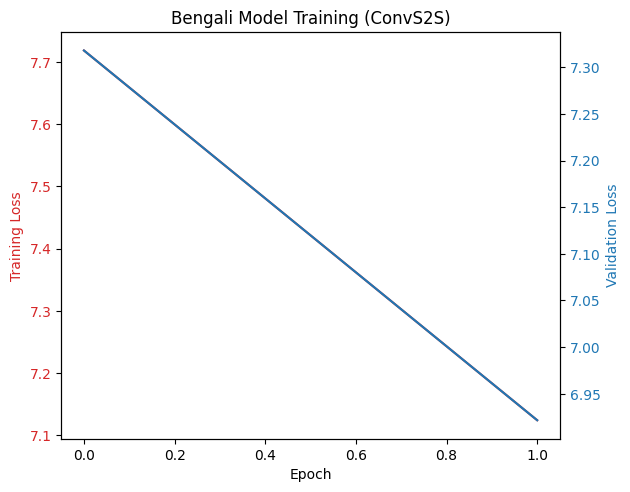

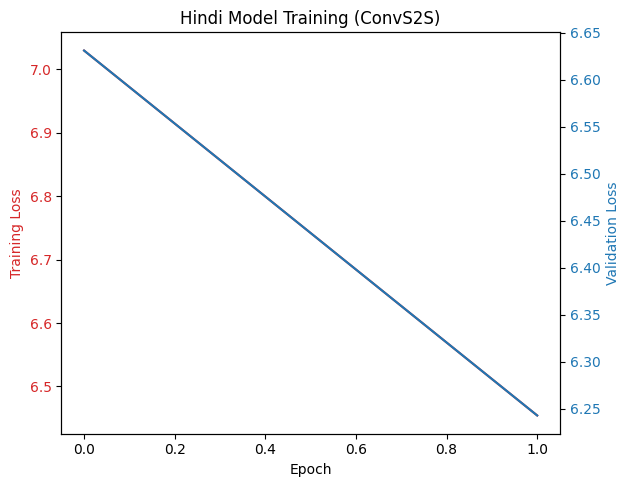

In [25]:
# === Train English-Bengali Model ===
bn_model = create_convs2s_model(
    bn_vocab_size, bn_vocab_size, # <-- Use shared vocab size for input/output
    bn_pad_idx, device,          # <-- Use BPE pad index
    EMB_DIM, HID_DIM, ENC_LAYERS, DEC_LAYERS,
    ENC_KERNEL_SIZE, DEC_KERNEL_SIZE, DROPOUT,
    max_len=seq_length 
)
bn_optimizer = create_optimizer(bn_model, LEARNING_RATE)
bn_scheduler = create_scheduler(bn_optimizer) # <--- CREATE SCHEDULER
bn_criterion = create_criterion(bn_pad_idx) # <-- Use BPE pad index

bn_model_save_name = 'best_bengali_model_convs2s.pt'
if os.path.exists(bn_model_save_name):
    print(f"Loading weights from {bn_model_save_name} to continue training...")
    bn_model.load_state_dict(torch.load(bn_model_save_name, map_location=device))

bn_model, bn_history = train_model(
    bn_model, bn_train_loader, bn_val_loader,
    bn_optimizer, bn_scheduler, bn_criterion, device, # <--- PASS SCHEDULER
    seq_length,
    epochs=2, 
    early_stopping_patience=5,
    model_save_name=bn_model_save_name,
    accumulation_steps=4
)

# === Train English-Hindi Model ===
hi_model = create_convs2s_model(
    hi_vocab_size, hi_vocab_size, # <-- Use shared vocab size for input/output
    hi_pad_idx, device,          # <-- Use BPE pad index
    EMB_DIM, HID_DIM, ENC_LAYERS, DEC_LAYERS,
    ENC_KERNEL_SIZE, DEC_KERNEL_SIZE, DROPOUT,
    max_len=seq_length
)
hi_optimizer = create_optimizer(hi_model, LEARNING_RATE)
hi_scheduler = create_scheduler(hi_optimizer) # <--- CREATE SCHEDULER
hi_criterion = create_criterion(hi_pad_idx) # <-- Use BPE pad index

hi_model_save_name = 'best_hindi_model_convs2s.pt'
if os.path.exists(hi_model_save_name):
    print(f"Loading weights from {hi_model_save_name} to continue training...")
    hi_model.load_state_dict(torch.load(hi_model_save_name, map_location=device))

hi_model, hi_history = train_model(
    hi_model, hi_train_loader, hi_val_loader,
    hi_optimizer, hi_scheduler, hi_criterion, device, # <--- PASS SCHEDULER
    seq_length,
    epochs=2,
    early_stopping_patience=5,
    model_save_name=hi_model_save_name,
    accumulation_steps=4
)

# [Plotting code remains the same]
def plot_history(history, title):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Training Loss', color=color)
    if history['train_loss']:
        ax1.plot(history['train_loss'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Validation Loss', color=color) 
    if history['val_loss']:
        ax2.plot(history['val_loss'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(title)
    plt.show()

if 'bn_history' in locals() and bn_history['train_loss']:
    plot_history(bn_history, "Bengali Model Training (ConvS2S)")
else:
    print("Bengali training history not available for plotting.")

if 'hi_history' in locals() and hi_history['train_loss']:
    plot_history(hi_history, "Hindi Model Training (ConvS2S)")
else:
    print("Hindi training history not available for plotting.")

In [26]:
#
# --- THIS IS THE NEW, OPTIMIZED PREDICTION CELL (replaces id: 39c4f881) ---
#
import torch
from tqdm import tqdm
import pandas as pd
import os
from torch.amp import autocast
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import json
import torch.nn.functional as F

# --- OPTIMIZATION: New Batched Greedy Search Function ---
def predict_greedy_batched(
    model, test_tensor, tokenizer,
    device, max_len=100, batch_size=32 # Use large batch size
):
    """
    Generates predictions for the entire test_tensor using
    a fast, batched greedy search.
    """
    model.eval()
    
    trg_sos_idx = tokenizer.token_to_id("<SOS>")
    trg_eos_idx = tokenizer.token_to_id("<EOS>")
    
    # --- 1. Create a DataLoader for the test tensor for batching ---
    test_dataset = TensorDataset(test_tensor)
    # Note: drop_last=False is important to predict on *all* test sentences
    test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size, drop_last=False)
    
    all_predictions = []
    
    # --- 2. Wrap entire inference in no_grad() ---
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Generating Predictions"):
            
            src_tensor_batch = batch[0].to(device) # Shape: [batch_size, seq_len]
            current_batch_size = src_tensor_batch.shape[0]
            
            # --- 3. Run encoder ONCE for the entire batch ---
            with torch.amp.autocast(device_type='cuda', enabled=True):
                encoder_conved, encoder_combined = model.encoder(src_tensor_batch)

            # --- 4. Initialize target tensors for the batch ---
            # Shape: [batch_size, 1]
            trg_tensor_batch = torch.LongTensor(
                [[trg_sos_idx]] * current_batch_size
            ).to(device)
            
            # --- 5. Create a mask to track which sentences are "done" ---
            # Shape: [batch_size]
            done_mask = torch.zeros(current_batch_size, dtype=torch.bool).to(device)

            # --- 6. Loop for token generation (auto-regressive) ---
            for i in range(max_len - 1): # -1 because we already have <SOS>
                
                # --- Run decoder ONCE per token for the whole batch ---
                with torch.amp.autocast(device_type='cuda', enabled=True):
                    output, _ = model.decoder(
                        trg_tensor_batch, 
                        encoder_conved, 
                        encoder_combined
                    )
                
                # Get the last token prediction for each item in the batch
                # output shape: [batch_size, current_len, vocab_size]
                # pred_token shape: [batch_size, 1]
                pred_token = output.argmax(2)[:,-1].unsqueeze(1)
                
                # Append the predicted token to the target tensors
                # Shape: [batch_size, current_len + 1]
                trg_tensor_batch = torch.cat((trg_tensor_batch, pred_token), dim=1)

                # Update the "done" mask for sentences that just generated an <EOS>
                # We use .squeeze(1) in case pred_token is [batch_size, 1]
                done_mask = done_mask | (pred_token.squeeze(1) == trg_eos_idx)

                # If all sentences in the batch are done, break early
                if done_mask.all():
                    break
            
            # Convert the generated token IDs to lists (cpu)
            generated_ids_list = trg_tensor_batch.cpu().tolist()
            all_predictions.extend(generated_ids_list)

    # --- 7. Decode all predictions at once (much faster) ---
    # Remove the <SOS> token from the start of each prediction
    cleaned_predictions = [ids[1:] for ids in all_predictions] 
    
    decoded_sentences = tokenizer.decode_batch(
        cleaned_predictions, 
        skip_special_tokens=True
    )
    
    return decoded_sentences


# --- UPDATED: Main prediction loop to call greedy search ---
def run_predictions_and_save(
    test_tensor,
    id_test_lang,
    language_name,
    model,
    tokenizer,
    device,
    seq_length,
    batch_size=32 # Set inference batch size
):
    print(f"\n--- Generating translations for {language_name} (Batched Greedy Search) ---")
    
    # --- Call the new fast function ---
    submission_translations = predict_greedy_batched(
        model, test_tensor, tokenizer, device, seq_length, batch_size
    )
    
    # --- Check for length mismatch (can happen if drop_last was True) ---
    if len(submission_translations) != len(id_test_lang):
        print(f"Error: Mismatch in prediction count!")
        print(f"Expected {len(id_test_lang)} translations, but generated {len(submission_translations)}")
        return None

    # --- Save to CSV ---
    df_submission = pd.DataFrame({
        "ID": id_test_lang,
        "Translation": submission_translations
    })
    
    output_filename = f"answers{'B' if language_name == 'Bengali' else 'H'}_bpe_convs2s.csv"
    df_submission.to_csv(output_filename, index=False)
    print(f"\n{output_filename} created successfully!")
    return output_filename


# --- Run predictions using the BPE models and components ---

# Predict Bengali
bn_model_path = 'best_bengali_model_convs2s.pt'
bn_csv = None
if os.path.exists(bn_model_path):
    print(f"\nLoading best Bengali ConvS2S model from {bn_model_path}...")
    bn_model_pred = create_convs2s_model(
        bn_vocab_size, bn_vocab_size, bn_pad_idx, device,
        EMB_DIM, HID_DIM, ENC_LAYERS, DEC_LAYERS,
        ENC_KERNEL_SIZE, DEC_KERNEL_SIZE, DROPOUT,
        max_len=seq_length
    )
    bn_model_pred.load_state_dict(torch.load(bn_model_path, map_location=device))

    bn_csv = run_predictions_and_save(
        bn_test_tensor, bn_id_test, "Bengali", bn_model_pred,
        bn_tokenizer, device, seq_length
    )
else:
    print("\nSkipping Bengali prediction: Model file not found.")

# Predict Hindi
hi_model_path = 'best_hindi_model_convs2s.pt'
hi_csv = None
if os.path.exists(hi_model_path):
    print(f"\nLoading best Hindi ConvS2S model from {hi_model_path}...")
    hi_model_pred = create_convs2s_model(
        hi_vocab_size, hi_vocab_size, hi_pad_idx, device,
        EMB_DIM, HID_DIM, ENC_LAYERS, DEC_LAYERS,
        ENC_KERNEL_SIZE, DEC_KERNEL_SIZE, DROPOUT,
        max_len=seq_length
    )
    hi_model_pred.load_state_dict(torch.load(hi_model_path, map_location=device))

    hi_csv = run_predictions_and_save(
        hi_test_tensor, hi_id_test, "Hindi", hi_model_pred,
        hi_tokenizer, device, seq_length
    )
else:
     print("\nSkipping Hindi prediction: Model file not found.")


# --- Combine and Zip (Unchanged from your code) ---
try:
    if bn_csv and hi_csv:
        print(f"\nLoading '{bn_csv}' and '{hi_csv}'...")
        df_bengali = pd.read_csv(bn_csv)
        df_hindi = pd.read_csv(hi_csv)

        combined_df = pd.concat([df_bengali, df_hindi], ignore_index=True)
        output_filename = "answer.csv"
        print(f"Creating '{output_filename}' with tab separation and quotes...")

        with open(output_filename, "w", encoding='utf-8') as f:
          f.write("ID\tTranslation\n")
          for index, row in combined_df.iterrows():
            translation_text = str(row["Translation"]) if pd.notna(row["Translation"]) else ""
            translation_text = translation_text.replace('"', '""')
            f.write(f'{str(row["ID"])}\t"{translation_text}"\n')

        print(f"'{output_filename}' created successfully!")
        print("Zipping 'answer.csv' into 'submission.zip'...")
        !zip -j submission.zip answer.csv
    else:
        print("\nCould not create final submission.zip as one or both prediction files are missing.")
except FileNotFoundError as e:
    print(f"Error: Could not find the file {e.filename}.")
except Exception as e:
    print(f"An error occurred during file processing or zipping: {e}")


Loading best Bengali ConvS2S model from best_bengali_model_convs2s.pt...
Creating ConvS2S Model...
ConvS2S Model created and weights initialized.

--- Generating translations for Bengali (Batched Greedy Search) ---


Generating Predictions: 100%|██████████| 615/615 [13:24<00:00,  1.31s/it]



answersB_bpe_convs2s.csv created successfully!

Loading best Hindi ConvS2S model from best_hindi_model_convs2s.pt...
Creating ConvS2S Model...
ConvS2S Model created and weights initialized.

--- Generating translations for Hindi (Batched Greedy Search) ---


Generating Predictions: 100%|██████████| 722/722 [14:00<00:00,  1.16s/it]



answersH_bpe_convs2s.csv created successfully!

Loading 'answersB_bpe_convs2s.csv' and 'answersH_bpe_convs2s.csv'...
Creating 'answer.csv' with tab separation and quotes...
'answer.csv' created successfully!
Zipping 'answer.csv' into 'submission.zip'...
  adding: answer.csv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


 (deflated 94%)
